In [86]:
from myclasses.sql_executor import SQLExecutor

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT * FROM aggCostReports
        """

    # Execute the query and get the result as a DataFrame
    costreport_df = sql_executor.execute_query(query)

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Dict to map ownership number to a prescribed category 
ownership_dict = {
    1: 'non-profit',
    2: 'non-profit',
    3: 'proprietary',
    4: 'proprietary',
    5: 'proprietary',
    6: 'proprietary',
    7: 'government',
    8: 'government',
    9: 'government',
    10: 'government',
    11: 'government',
    12: 'government',
    13: 'government'
}

# Map ownership type to the DataFrame
costreport_df['ownership_type'] = costreport_df['ownership'].map(ownership_dict)
costreport_df_clean = costreport_df.dropna(subset=['tot_income'])

time_series_dict = {}

# Loop to create a unique group for each years total income type with it's associated ownership type
for i, g in costreport_df_clean[['ownership_type','fiscal_year','tot_income']].groupby(['ownership_type','fiscal_year']):
    time_series_dict[i] = list(g['tot_income'])

In [88]:
# Function to remove outliers using IQR method
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x/1000 for x in data if lower_bound <= x <= upper_bound]

# Function to create a box and whisker plot for the ownership type
def box_and_whisker(ownership):
    filtered_dict = {key[1]: value for key, value in time_series_dict.items() if key[0] == ownership}
    sorted_dict = dict(sorted(filtered_dict.items()))

    # Remove outliers from the data
    cleaned_dict = {year: remove_outliers(values) for year, values in sorted_dict.items()}

    data = list(cleaned_dict.values())
    labels = list(cleaned_dict.keys())

    fig, ax = plt.subplots()

    ax.boxplot(data, patch_artist=True)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Values')

    plt.title(f'Total Income Box and Whiskers: {ownership}')
    plt.grid(True)

    plt.show()

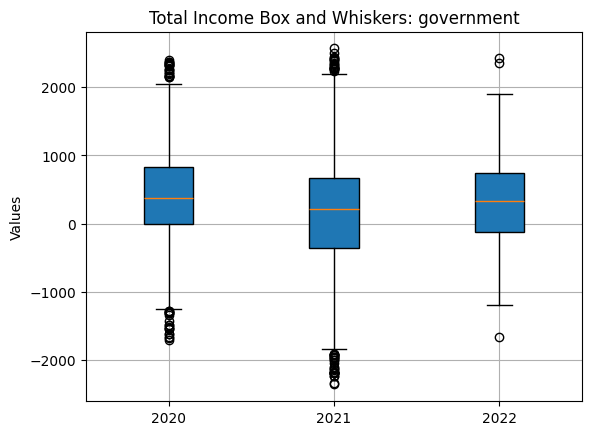

In [89]:
box_and_whisker('government')